In [1]:

# General libraries
import pandas as pd
import numpy as np

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm


# 3.0 CLUSTERING

## Clustering Pre-processing

In Clustering, we will re-load the dataframe as similar to 2.EDA. and 2.0.3 Group Crypto by Year. This will ensure that if we only want to run the Clustering, we will not need to run the whole thing from top down. The CLustering is INDEPENDENT from EDA.

In [2]:
# Re-Load the dataset
combined_1H_clean = pd.read_pickle('1H_combined_clean.pkl')
combined_1H_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7046348 entries, 0 to 33103
Data columns (total 12 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Open time                     datetime64[ns]
 1   Open                          float64       
 2   High                          float64       
 3   Low                           float64       
 4   Close                         float64       
 5   Volume                        float64       
 6   Close time                    datetime64[ns]
 7   Quote asset volume            float64       
 8   Number of trades              int64         
 9   Taker buy base asset volume   float64       
 10  Taker buy quote asset volume  float64       
 11  symbol                        object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 698.9+ MB


In [3]:
# Group by YEAR

# Drop the Open time columns as we will work only with Close time
crypto_year = combined_1H_clean[combined_1H_clean.columns.difference(['Open time'])]

# dt.year only able to run once, then it will convert the dtype into int64
crypto_year['Close time'] = crypto_year['Close time'].dt.to_period('Y')

# Get mean value 
crypto_year = crypto_year.groupby(['Close time', 'symbol'])[['Close', 'High', 'Low', 'Number of trades', 'Open',
       'Quote asset volume', 'Taker buy base asset volume', 
       'Taker buy quote asset volume', 'Volume']].sum()

print(crypto_year)


C:\Users\ethai\AppData\Local\Temp\ipykernel_16612\279693825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_year['Close time'] = crypto_year['Close time'].dt.to_period('Y')


                           Close          High           Low  \
Close time symbol                                              
2017       BCCUSDT  2.125306e+06  2.178818e+06  2.075277e+06   
           BNBUSDT  4.390296e+03  4.483804e+03  4.277244e+03   
           BTCUSDT  2.482040e+07  2.509261e+07  2.451488e+07   
           ETHUSDT  1.261660e+06  1.275878e+06  1.246570e+06   
           LTCUSDT  1.242656e+05  1.271009e+05  1.214404e+05   
...                          ...           ...           ...   
2022       YGGUSDT  1.171203e+04  1.184296e+04  1.159656e+04   
           ZECUSDT  7.487720e+05  7.554168e+05  7.422936e+05   
           ZENUSDT  2.090280e+05  2.108487e+05  2.072660e+05   
           ZILUSDT  4.084844e+02  4.127752e+02  4.043106e+02   
           ZRXUSDT  3.580955e+03  3.613825e+03  3.550283e+03   

                    Number of trades          Open  Quote asset volume  \
Close time symbol                                                        
2017       BCCUSDT 

In [4]:
# Reset the index to check the value counts by time
crypto_year = crypto_year.reset_index()

# Value counts to rank the highest values based on year
crypto_year.value_counts('Close time')


Close time
2022    370
2021    351
2020    244
2019     88
2018     23
2017      6
Freq: A-DEC, dtype: int64

In [5]:
# Check our final dataframe
crypto_year

,Close time,symbol,Close,High,Low,Number of trades,Open,Quote asset volume,Taker buy base asset volume,Taker buy quote asset volume,Volume
0,2017,BCCUSDT,2.125306e+06,2.178818e+06,2.075277e+06,622378,2.124094e+06,6.038975e+08,1.310257e+05,2.806497e+08,2.995961e+05
1,2017,BNBUSDT,4.390296e+03,4.483804e+03,4.277244e+03,715778,4.384036e+03,2.152501e+08,2.001157e+07,1.035925e+08,4.223590e+07
2,2017,BTCUSDT,2.482040e+07,2.509261e+07,2.451488e+07,4257891,2.481122e+07,7.246707e+09,3.054588e+05,3.758988e+09,5.959944e+05
3,2017,ETHUSDT,1.261660e+06,1.275878e+06,1.246570e+06,2543368,1.261294e+06,1.450929e+09,1.321642e+06,7.095282e+08,2.748370e+06
4,2017,LTCUSDT,1.242656e+05,1.271009e+05,1.214404e+05,316334,1.243138e+05,1.400340e+08,2.452994e+05,6.490002e+07,5.339082e+05
...,...,...,...,...,...,...,...,...,...,...,...
1077,2022,YGGUSDT,1.171203e+04,1.184296e+04,1.159656e+04,7708514,1.171720e+04,1.723826e+09,1.003171e+09,8.360148e+08,2.069933e+09
1078,2022,ZECUSDT,7.487720e+05,7.554168e+05,7.422936e+05,15201707,7.488701e+05,5.351917e+09,2.547541e+07,2.662059e+09,5.136972e+07
1079,2022,ZENUSDT,2.090280e+05,2.108487e+05,2.072660e+05,7314615,2.090781e+05,1.393017e+09,2.425709e+07,6.721518e+08,5.046503e+07
1080,2022,ZILUSDT,4.084844e+02,4.127752e+02,4.043106e+02,44655377,4.085371e+02,1.579617e+10,9.588370e+10,7.859990e+09,1.940457e+11


As we see that 2022 is the latest year and they have the most data. Thus, clustering based on 2022 dataframe would be more relevant than clustering based on previous years. However, the trade off is that some Cryptos were delisted in previous years, thus there is no data on the delisted cryptos happened prior to 2022. 

The goal of this project is to cluster Cryptos into different groups to see which groups have higher performance and which groups may have scammy cryptos. If the cryptos were delisted prior to 2022 then we will not know which groups these delisted cryptos can be in.

In [6]:
# Select Year 2022
crypto_2022 = crypto_year[crypto_year['Close time'] == '2022'].set_index('symbol')

# Dop the Close time columns
crypto_2022 = crypto_2022[crypto_2022.columns.difference([crypto_2022.columns[0]])]

crypto_2022

,Close,High,Low,Number of trades,Open,Quote asset volume,Taker buy base asset volume,Taker buy quote asset volume,Volume
symbol,,,,,,,,,
1INCHUSDT,8642.50500,8711.76400,8574.24200,12084111,8644.45300,2.824607e+09,1.261550e+09,1.389428e+09,2.576546e+09
AAVEUSDT,945554.20000,954446.10000,936731.80000,26676338,945748.60000,7.941435e+09,3.495794e+07,3.934185e+09,7.039783e+07
ACAUSDT,4578.90390,4647.36290,4522.46120,6308924,4580.97620,1.434604e+09,1.323574e+09,6.919052e+08,2.738373e+09
ACHUSDT,186.57620,188.94743,184.70702,7179867,186.63404,1.960408e+09,3.554669e+10,9.104213e+08,8.083403e+10
ACMUSDT,33874.92400,34238.08500,33578.47700,4191912,33878.78000,7.222960e+08,8.021763e+07,3.539698e+08,1.646745e+08
...,...,...,...,...,...,...,...,...,...
YGGUSDT,11712.02740,11842.96280,11596.56380,7708514,11717.19830,1.723826e+09,1.003171e+09,8.360148e+08,2.069933e+09
ZECUSDT,748772.00000,755416.80000,742293.56000,15201707,748870.10000,5.351917e+09,2.547541e+07,2.662059e+09,5.136972e+07
ZENUSDT,209028.02000,210848.68000,207265.98000,7314615,209078.08000,1.393017e+09,2.425709e+07,6.721518e+08,5.046503e+07


## Clustering Processing 

In [7]:
# Check the columns, these are all the features that were used in the Clustering
crypto_2022.columns

Index(['Close', 'High', 'Low', 'Number of trades', 'Open',
       'Quote asset volume', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Volume'],
      dtype='object')

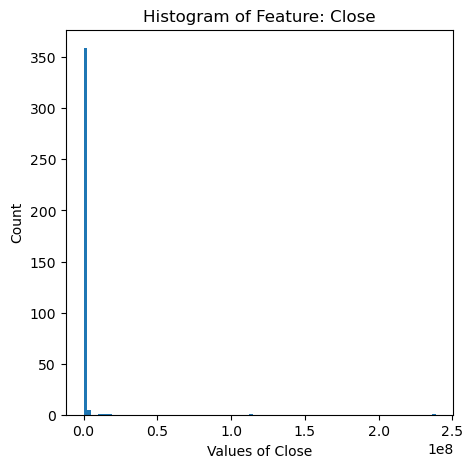

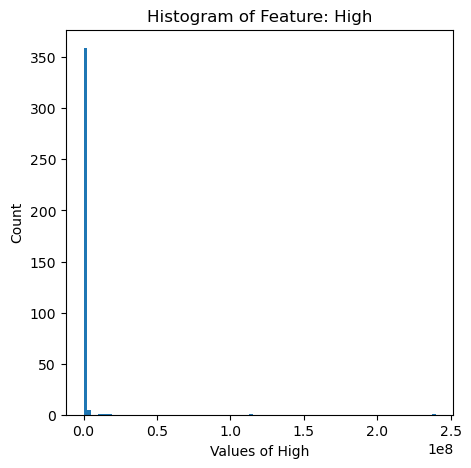

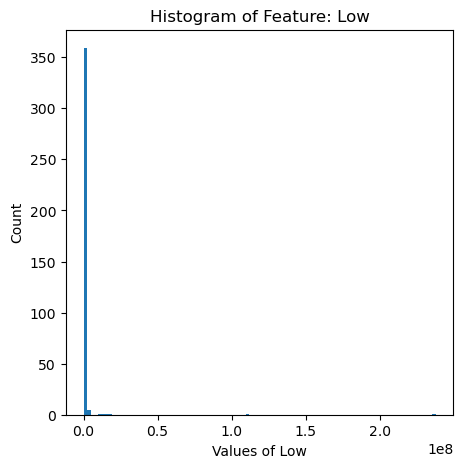

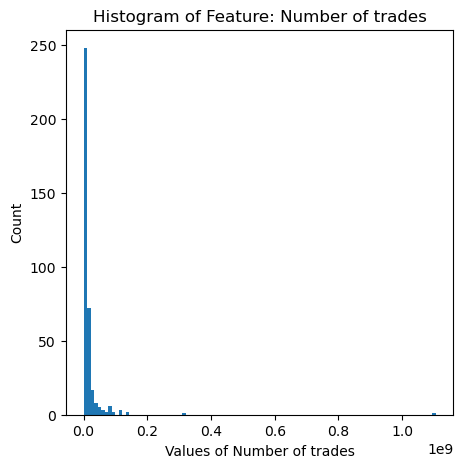

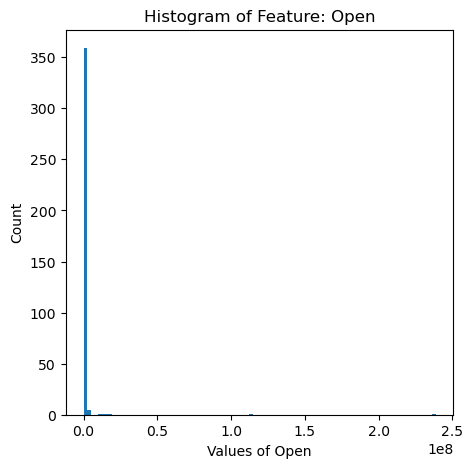

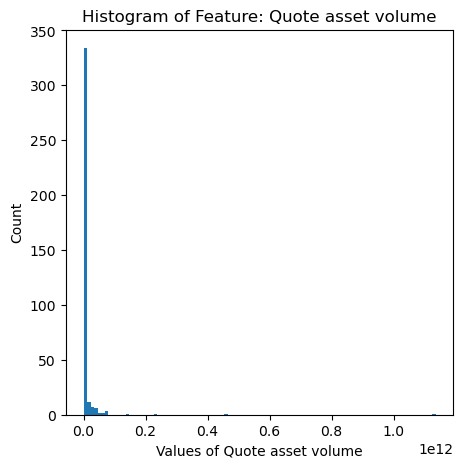

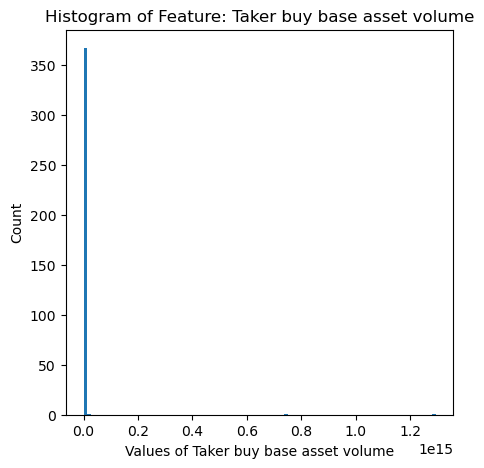

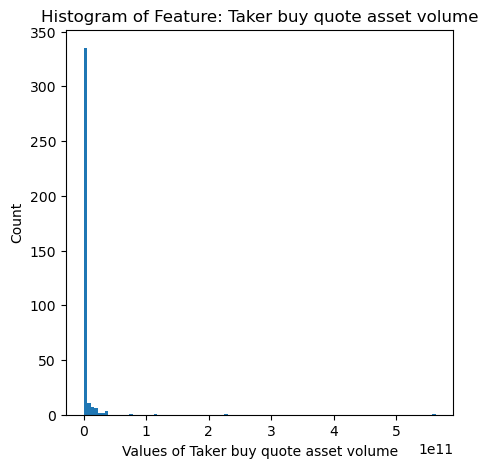

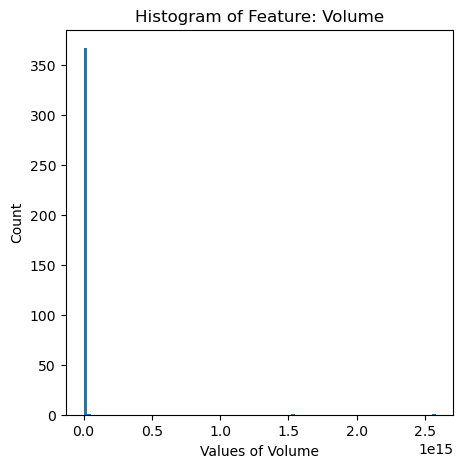

In [8]:
# Look at data distribution

#Let's build some plots to look at the data distribution

for column in crypto_2022.columns:
    plt.figure(figsize=(5,5))
    plt.title(f"Histogram of Feature: {column}")
    plt.ylabel('Count')
    plt.xlabel(f"Values of {column}")
    plt.hist(crypto_2022[column], bins=100)
    plt.show()

Clustering are distance based models. Because the majority of the above features are right-skewed, let's log-scale ALL features to make the distribution more even (i.e. closer to normal).

In [9]:
 #Reminder: Log 0 is undefined so we want to use Log 1 instead. 

#Log scale ALL columns and add 1 to avoid taking the log of 0. 
crypto_2022_log = np.log(crypto_2022 +1)
crypto_2022_log.isna().sum()

Close                           0
High                            0
Low                             0
Number of trades                0
Open                            0
Quote asset volume              0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Volume                          0
dtype: int64

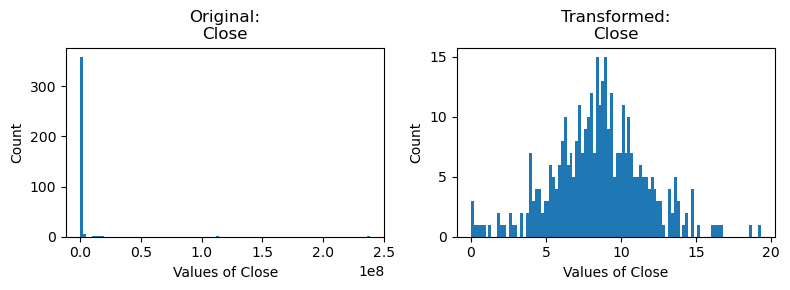

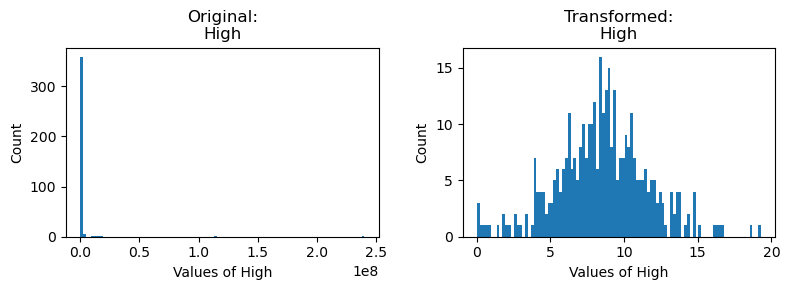

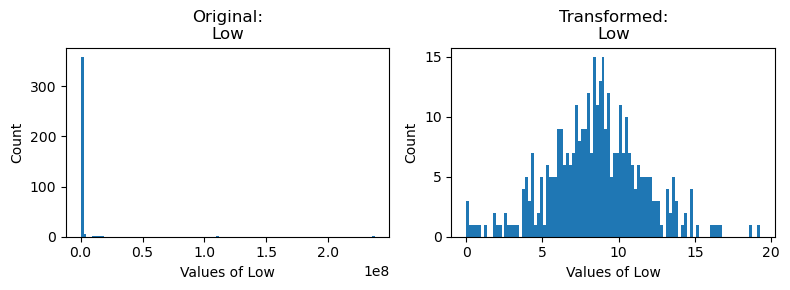

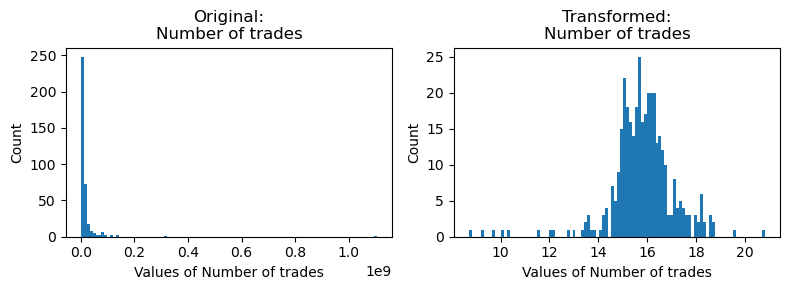

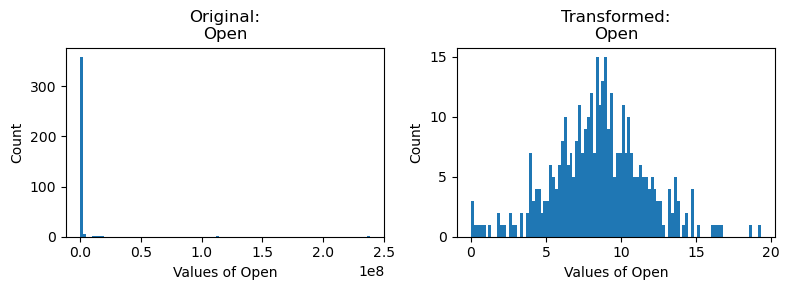

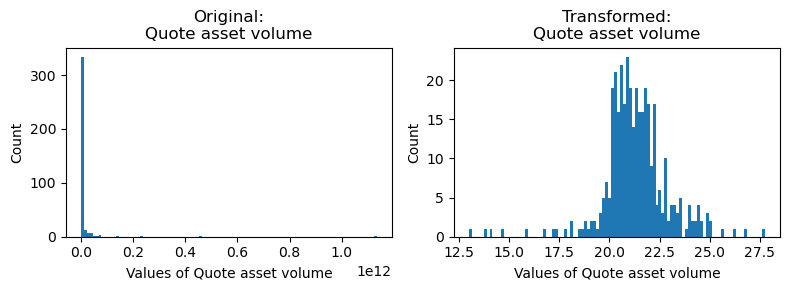

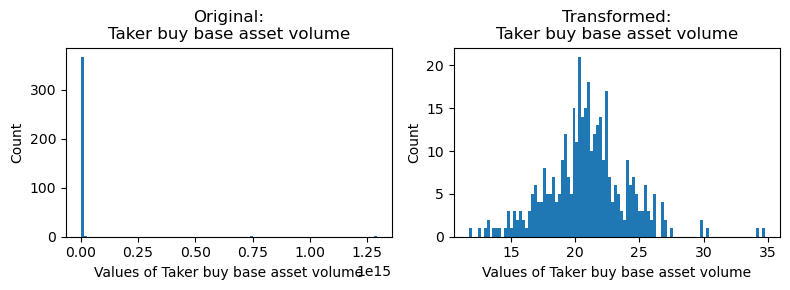

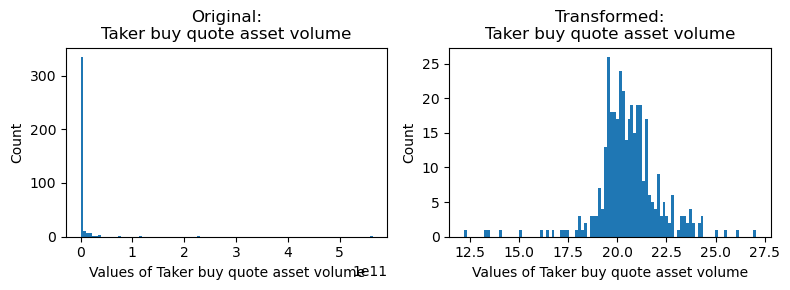

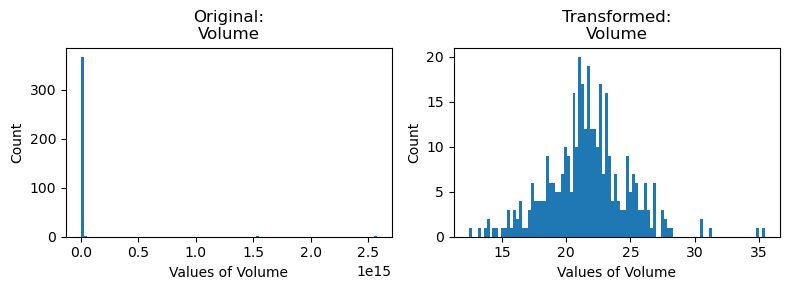

In [10]:
# Plot original vs log_transformed data

for column in crypto_2022.columns: 
    plt.subplots(1, 2, figsize=(8,3))
    plt.tight_layout()
    
    plt.subplot(1, 2, 1)
    plt.title(f"Original:\n{column}")
    plt.hist(crypto_2022[column], bins=100)
    plt.ylabel('Count')
    plt.xlabel(f"Values of {column}")
    
    plt.subplot(1, 2, 2)
    plt.title(f"Transformed:\n{column}")
    plt.hist(crypto_2022_log[column], bins=100)
    plt.ylabel('Count')
    plt.xlabel(f"Values of {column}")
    plt.tight_layout()
    plt.show()

Scale the data prior to clustering (Kmeans need scaled data)

In [11]:
#Scale data - using a standard scaler because the model has lots of outliers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

crypto_2022_log_scaled = scaler.fit_transform(crypto_2022_log)

In [12]:
# Put the scaled data into a DF
crypto_2022_log_scaled_df = pd.DataFrame(data=crypto_2022_log_scaled, columns=crypto_2022_log.columns, index=crypto_2022_log.index)
crypto_2022_log_scaled_df

,Close,High,Low,Number of trades,Open,Quote asset volume,Taker buy base asset volume,Taker buy quote asset volume,Volume
symbol,,,,,,,,,
1INCHUSDT,0.176315,0.175518,0.176744,0.382919,0.176316,0.295528,0.008354,0.294415,0.009339
AAVEUSDT,1.697234,1.697018,1.697172,0.985537,1.697229,0.933449,-1.138113,0.937766,-1.141447
ACAUSDT,-0.029433,-0.028027,-0.030450,-0.111669,-0.029359,-0.122551,0.023698,-0.136540,0.028810
ACHUSDT,-1.064524,-1.063946,-1.064752,-0.013261,-1.064497,0.070150,1.075710,0.033109,1.110866
ACMUSDT,0.618793,0.618904,0.618936,-0.422769,0.618758,-0.546016,-0.872562,-0.550830,-0.869798
...,...,...,...,...,...,...,...,...,...
YGGUSDT,0.274760,0.274988,0.274547,0.040803,0.274831,-0.009214,-0.064916,-0.019593,-0.060645
ZECUSDT,1.621645,1.621253,1.621806,0.557579,1.621616,0.689914,-1.239280,0.696324,-1.242176
ZENUSDT,1.208301,1.207819,1.208541,0.000888,1.208307,-0.140704,-1.254947,-0.154444,-1.247855


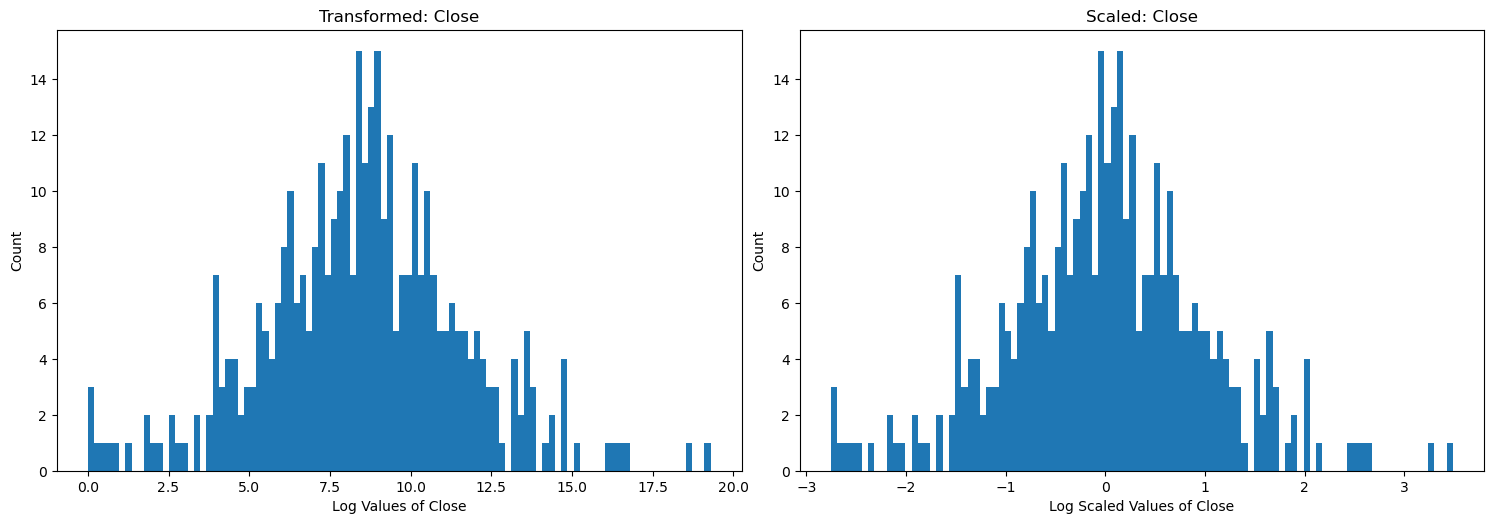

In [13]:
# Check 1 scaled column

COLUMN = 'Close'
plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.title(f"Transformed: {COLUMN}")
plt.hist(crypto_2022_log[COLUMN], bins=100)
plt.ylabel('Count')
plt.xlabel(f"Log Values of {COLUMN}")

plt.subplot(1, 2, 2)
plt.title(f"Scaled: {COLUMN}")
plt.hist(crypto_2022_log_scaled_df[COLUMN], bins=100)
plt.ylabel('Count')
plt.xlabel(f"Log Scaled Values of {COLUMN}")
plt.show()

## Feature Decomposition

We will perform Feature Decomposition using both PCA and tSNE. Based on the results, we will the either PCA or tSNE for futher analysis.

### PCA

In [14]:
from sklearn.decomposition import PCA
# Use default hyperparameters
pca = PCA(n_components=4)
pca_data = pca.fit_transform(crypto_2022_log_scaled_df)

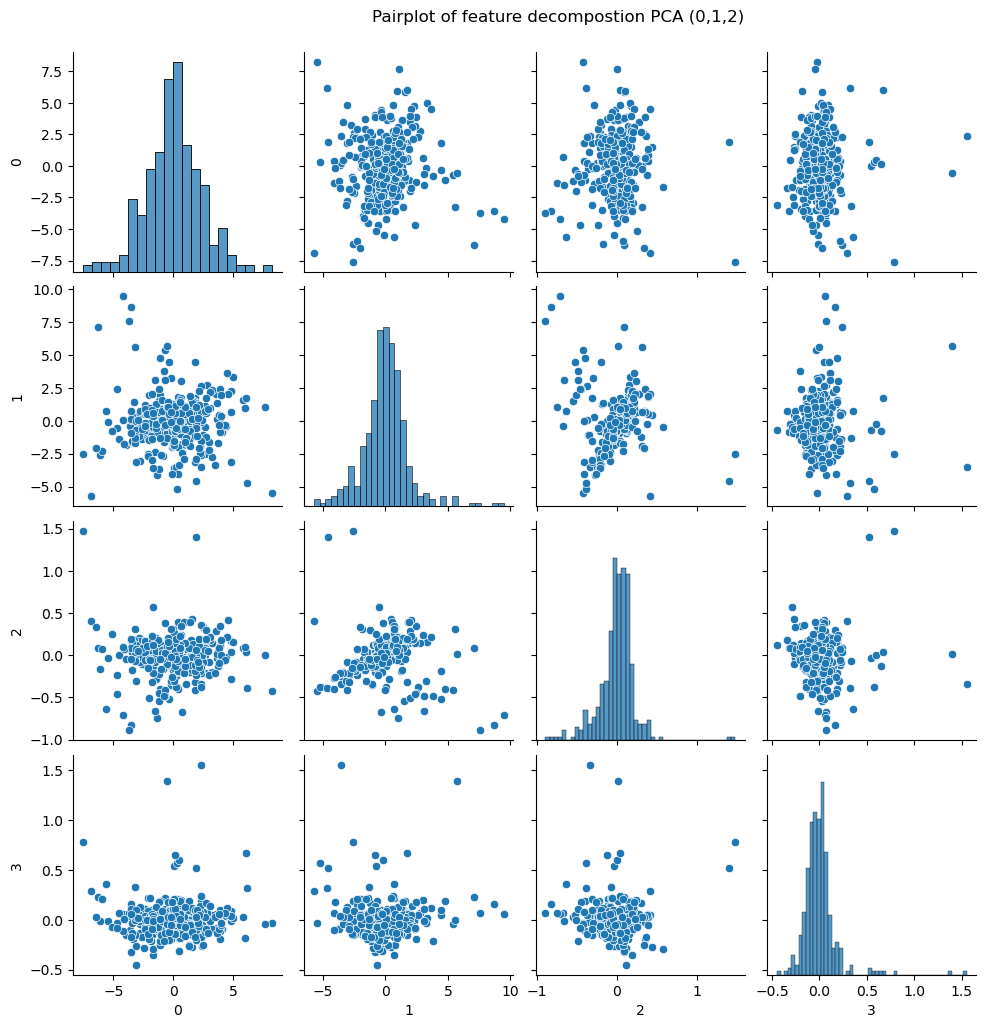

In [15]:
# PLot the pca data
sns.pairplot(pd.DataFrame(pca_data))
plt.title("Pairplot of feature decompostion PCA (0,1,2)", y=4.3, x=-1)
plt.show()

### tSNE

Alternative to PCA to try and better understand the pattern: 
We can try using T-SNE (t-Distributed Stochastic Neighbor Embedding) which is an alternative/ different method from PCA. 

T-SNE: 
- Works by trying to preserve small distances or local similarities compared to PCA which tries to preserve large distances to maximize variance. 
- T-SNE is a unsupervised, non-linear technique that works best to visualize high dimensional data. 

PCA: 
- PCA is a unsupervised, linear technique. 

Summary: When you're dealing with geometric shapes for your clusters (ball, cylinder, curve etc.) T-SNE will perform better than PCA.

In [16]:
from sklearn.manifold import TSNE

#t-SNE is designed to work best with 2-3 components
tsne = TSNE(n_components=3, verbose=2, random_state=1)
crypto_2022_log_scaled_df_tsne = tsne.fit_transform(crypto_2022_log_scaled_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 370 samples in 0.000s...
[t-SNE] Computed neighbors for 370 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 370 / 370
[t-SNE] Mean sigma: 0.584249
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 69.7715836, gradient norm = 0.3762527 (50 iterations in 0.048s)
[t-SNE] Iteration 100: error = 81.2618561, gradient norm = 0.3364271 (50 iterations in 0.044s)
[t-SNE] Iteration 150: error = 90.1385498, gradient norm = 0.3074319 (50 iterations in 0.046s)
[t-SNE] Iteration 200: error = 98.7752686, gradient norm = 0.3040656 (50 iterations in 0.045s)
[t-SNE] Iteration 250: error = 105.6089401, gradient norm = 0.2630109 (50 iterations in 0.049s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.608940
[t-SNE] Iteration 300: error = 2.7085197, gradient norm = 0.0005074 (50 iterations in 0.049s)
[t-SNE] Iteration 350: error = 2.2813265, gradient norm = 0.0002043

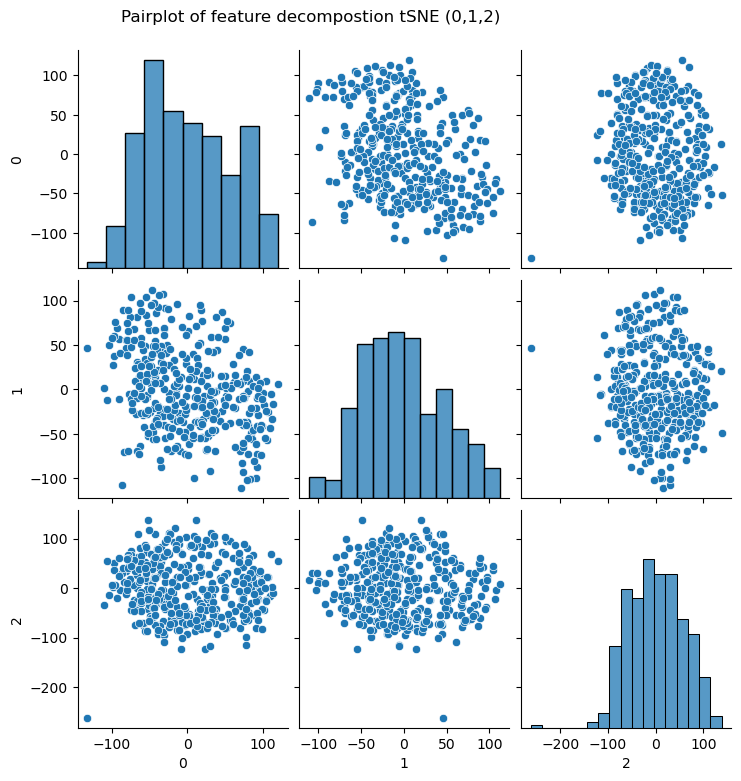

In [17]:
# plot the tsne data
sns.pairplot(pd.DataFrame(crypto_2022_log_scaled_df_tsne))
plt.title("Pairplot of feature decompostion tSNE (0,1,2)", y=3.2, x=-1)
plt.show()

## KMeans Clustering

In [18]:
#Figure out how many clusters is best. 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Explore different values for K
ks = np.arange(2, 11)
inertia_list = []
silhouette_score_list = []

for k in ks: 
    
    #Instantiate
    my_kmeans = KMeans(n_clusters=k, random_state=0)
    
    #Fit (i.e. get clusters)
    y_labels = my_kmeans.fit_predict(crypto_2022_log_scaled_df)
    
    #Append inertia
    inertia_list.append(my_kmeans.inertia_)
    
    #Append silhouette
    silhouette = silhouette_score(crypto_2022_log_scaled_df, y_labels)
    silhouette_score_list.append(silhouette)
    
    print(f"Computed Score for k={k}")

Computed Score for k=2
Computed Score for k=3
Computed Score for k=4
Computed Score for k=5
Computed Score for k=6
Computed Score for k=7
Computed Score for k=8
Computed Score for k=9
Computed Score for k=10


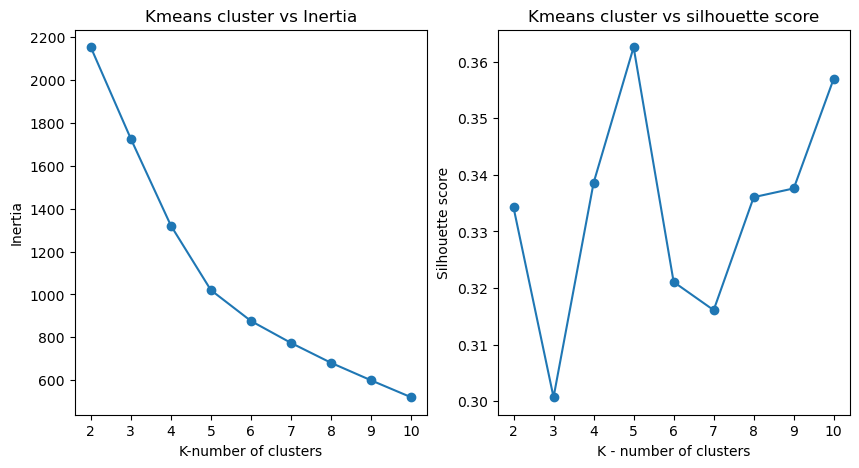

In [19]:
# Plot the inertia and Silhouette score for each k values.
plt.subplots(1, 2, figsize=(10,5))

#Visualize the Inertia    
plt.subplot(1, 2, 1)
plt.plot(ks, inertia_list, marker='o')
plt.xlabel('K-number of clusters')
plt.ylabel('Inertia')
plt.title('Kmeans cluster vs Inertia')
plt.xticks(ks)

#Plot the silhouette score    
plt.subplot(1, 2, 2)
plt.plot(ks, silhouette_score_list, marker='o')
plt.xlabel('K - number of clusters')
plt.ylabel('Silhouette score')
plt.title('Kmeans cluster vs silhouette score')
plt.xticks(ks)
plt.show()

If you notice after the 6th dot the values level off quite a bit, this means the new centroids are not reducing the inertia by much - there is clearly a point where there is a "law of diminishing returns". This suggests ideal number of classes is 5.

This type of visual is referred to as a _**scree plot**_ and using this visual heuristic is referred to as the ["elbow method"](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_elbow_method), since we look for the "elbow" in the chart to inform our choice for $K$.

While not very scientific, this can be a nice approximation. How we draw the cutoff is hard to determine, it sometimes relies on subjective judgment and further investigation. 

In essence, the silhouette score measures how similar the points are to their assigned clusters, relative to the other clusters they are not assigned to. Unlike minimizing inertia, the goal is to maximize silhouette score - a greater silhouette score (closer to 1) means our clusters are well separated and closer on average to points in their cluster than others. Let's compare with our previous methodology, only now looking at silhouette score instead of inertia. We must iterate from 2 upward, as silhouette is only defined for one cluster or more. the 5th dot is also the highest silhouette score.

In [20]:
# Final Kmeans model
kmeans = KMeans(n_clusters=5, random_state=0) # apply random_state=0 to have the same cluster lables every run, source: https://stats.stackexchange.com/questions/224759/how-to-avoid-k-means-assigning-different-labels-on-different-run
kmeans_y_labels = kmeans.fit_predict(crypto_2022_log_scaled_df)

# Add labels so we can colour different clusters
crypto_2022_log_scaled_df_kmeans = crypto_2022_log_scaled_df.copy()
crypto_2022_log_scaled_df_kmeans['kmeans_labels'] = kmeans_y_labels

In [21]:
crypto_2022_log_scaled_df_kmeans.head(5)

,Close,High,Low,Number of trades,Open,Quote asset volume,Taker buy base asset volume,Taker buy quote asset volume,Volume,kmeans_labels
symbol,,,,,,,,,,
1INCHUSDT,0.176315,0.175518,0.176744,0.382919,0.176316,0.295528,0.008354,0.294415,0.009339,0
AAVEUSDT,1.697234,1.697018,1.697172,0.985537,1.697229,0.933449,-1.138113,0.937766,-1.141447,1
ACAUSDT,-0.029433,-0.028027,-0.030450,-0.111669,-0.029359,-0.122551,0.023698,-0.136540,0.028810,0
ACHUSDT,-1.064524,-1.063946,-1.064752,-0.013261,-1.064497,0.070150,1.075710,0.033109,1.110866,3
ACMUSDT,0.618793,0.618904,0.618936,-0.422769,0.618758,-0.546016,-0.872562,-0.550830,-0.869798,1


### tSNE Refit with KMeans labels

In [22]:
# refit the clusters from the first Kmeans model using your PCA features
tsne = TSNE(n_components=3, verbose=2, random_state=1)

# We need to drop the labels so tSNE won't use them when computing distances
tsne_data = tsne.fit_transform(crypto_2022_log_scaled_df_kmeans.drop('kmeans_labels', axis=1))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 370 samples in 0.000s...
[t-SNE] Computed neighbors for 370 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 370 / 370
[t-SNE] Mean sigma: 0.584249
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 69.7715836, gradient norm = 0.3762527 (50 iterations in 0.054s)
[t-SNE] Iteration 100: error = 81.2618561, gradient norm = 0.3364271 (50 iterations in 0.048s)
[t-SNE] Iteration 150: error = 90.1385498, gradient norm = 0.3074319 (50 iterations in 0.049s)
[t-SNE] Iteration 200: error = 98.7752686, gradient norm = 0.3040656 (50 iterations in 0.046s)
[t-SNE] Iteration 250: error = 105.6089401, gradient norm = 0.2630109 (50 iterations in 0.048s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.608940
[t-SNE] Iteration 300: error = 2.7085197, gradient norm = 0.0005074 (50 iterations in 0.050s)
[t-SNE] Iteration 350: error = 2.2813265, gradient norm = 0.0002043

In [23]:
# Put the tsne fit_transform data into a data frame
tsne_df = pd.DataFrame(tsne_data, columns=[f'tSNE D{i+1}' for i in range(tsne_data.shape[1])], index=crypto_2022_log.index)
tsne_df['kmeans_labels'] = crypto_2022_log_scaled_df_kmeans['kmeans_labels'].values
tsne_df

,tSNE D1,tSNE D2,tSNE D3,kmeans_labels
symbol,,,,
1INCHUSDT,-20.679499,-22.193806,10.353609,0
AAVEUSDT,-96.933891,37.907139,50.337471,1
ACAUSDT,-28.761068,-54.634220,-41.648212,0
ACHUSDT,92.612633,-10.188857,3.950336,3
ACMUSDT,-26.035736,50.008694,-29.376457,1
...,...,...,...,...
YGGUSDT,-52.360050,-23.013147,-22.401773,0
ZECUSDT,-80.130112,38.321434,57.958187,1
ZENUSDT,-99.604683,57.380966,7.063782,1


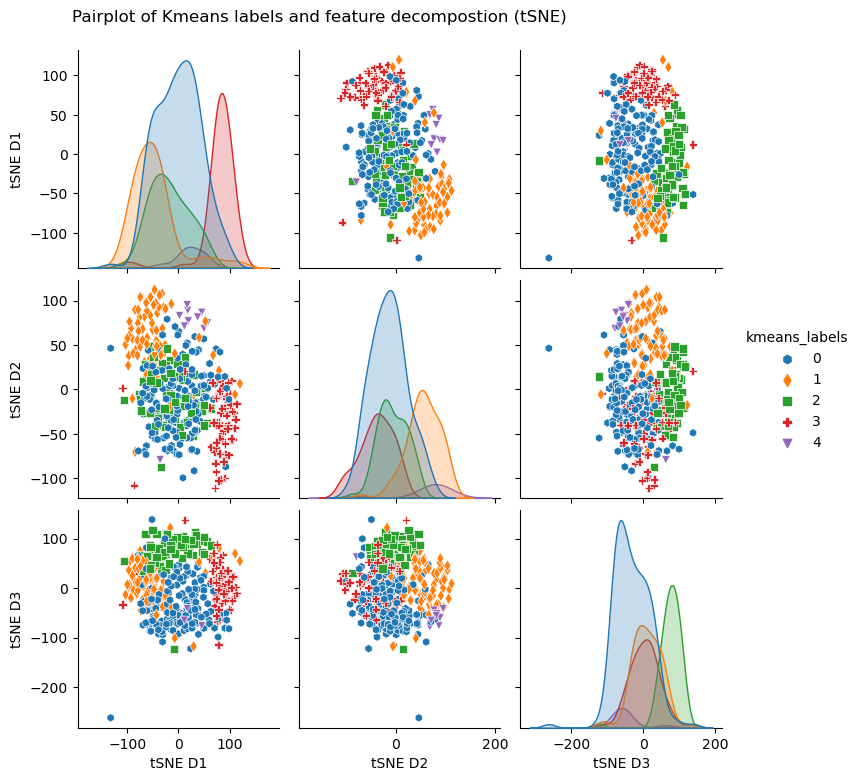

In [24]:
sns.pairplot(tsne_df, hue="kmeans_labels", markers=["h", "d", "s", "P", "v"], palette="tab10")
plt.title("Pairplot of Kmeans labels and feature decompostion (tSNE)", y=3.2, x=-1)
plt.show()

### PCA Redit with KMeans Labels

In [25]:
pca = PCA(n_components=4)
#We need to drop the labels so PCA won't use them when computing distances
pca_data = pca.fit_transform(crypto_2022_log_scaled_df_kmeans.drop('kmeans_labels', axis=1))

## Put the pca fit_transform data into a data frame
pca_df = pd.DataFrame(pca_data, columns=[f'pca D{i+1}' for i in range(pca_data.shape[1])], index=crypto_2022_log.index)
pca_df['kmeans_labels'] = crypto_2022_log_scaled_df_kmeans['kmeans_labels'].values
pca_df

,pca D1,pca D2,pca D3,pca D4,kmeans_labels
symbol,,,,,
1INCHUSDT,0.413489,-0.517093,-0.010753,-0.080899,0
AAVEUSDT,4.013976,-0.846027,-0.072698,-0.092672,1
ACAUSDT,-0.113564,0.175552,0.084078,0.009188,0
ACHUSDT,-2.541750,-0.679699,0.004142,0.074320,3
ACMUSDT,1.455938,1.300656,0.104895,-0.087263,1
...,...,...,...,...,...
YGGUSDT,0.511428,0.016228,0.223735,0.011854,0
ZECUSDT,3.842212,-0.307128,-0.088847,0.061623,1
ZENUSDT,2.868096,0.876956,0.044716,-0.134089,1


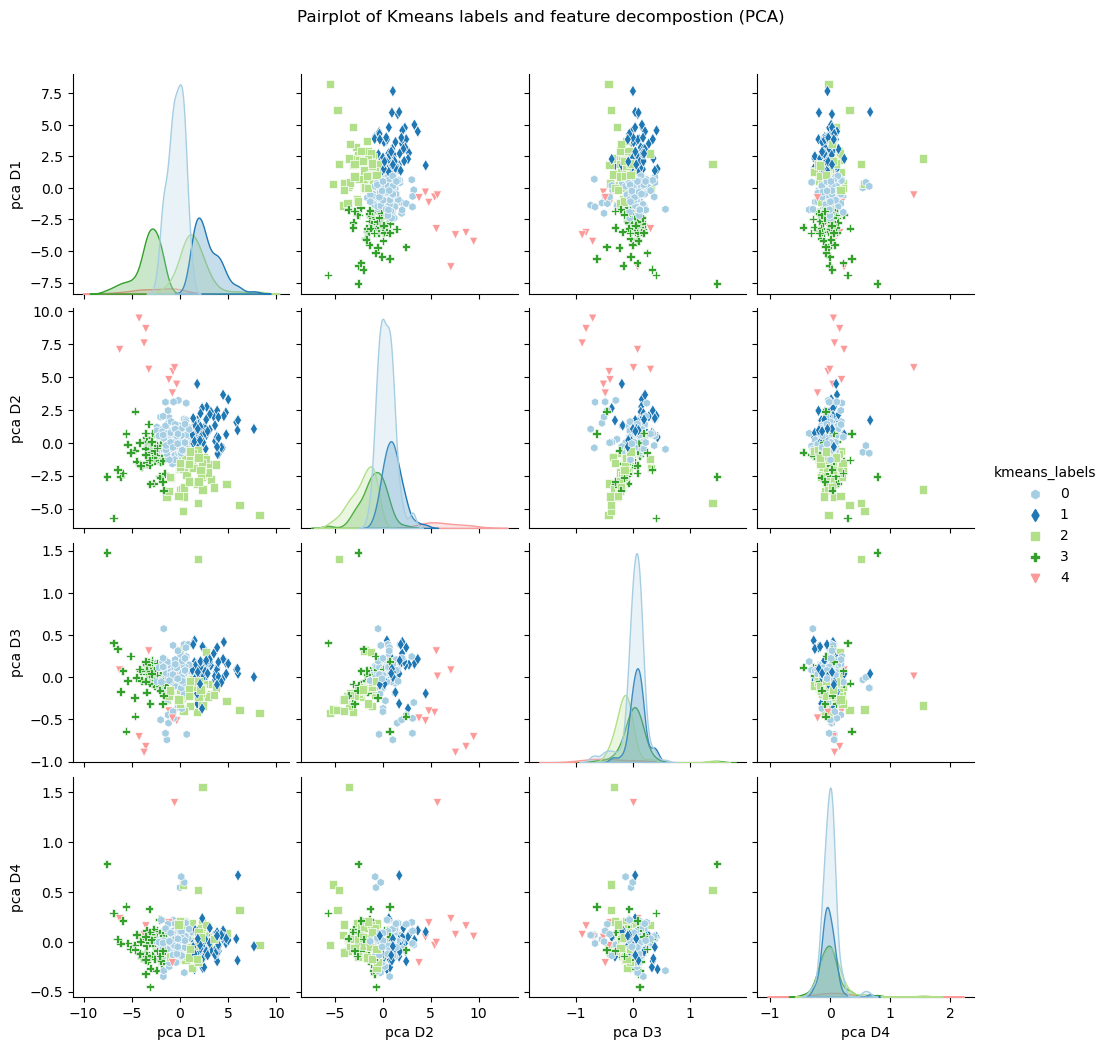

In [26]:
sns.pairplot(pca_df, hue="kmeans_labels", markers=["h", "d", "s", "P", "v"], palette="Paired")
plt.title("Pairplot of Kmeans labels and feature decompostion (PCA)", y=4.4, x=-1)
plt.show()

## Assign Trust value to each Kmeans labels based on Domain Knowledge

In [27]:
# Check the crypto and labels
crypto_2022_log_scaled_df_kmeans

,Close,High,Low,Number of trades,Open,Quote asset volume,Taker buy base asset volume,Taker buy quote asset volume,Volume,kmeans_labels
symbol,,,,,,,,,,
1INCHUSDT,0.176315,0.175518,0.176744,0.382919,0.176316,0.295528,0.008354,0.294415,0.009339,0
AAVEUSDT,1.697234,1.697018,1.697172,0.985537,1.697229,0.933449,-1.138113,0.937766,-1.141447,1
ACAUSDT,-0.029433,-0.028027,-0.030450,-0.111669,-0.029359,-0.122551,0.023698,-0.136540,0.028810,0
ACHUSDT,-1.064524,-1.063946,-1.064752,-0.013261,-1.064497,0.070150,1.075710,0.033109,1.110866,3
ACMUSDT,0.618793,0.618904,0.618936,-0.422769,0.618758,-0.546016,-0.872562,-0.550830,-0.869798,1
...,...,...,...,...,...,...,...,...,...,...
YGGUSDT,0.274760,0.274988,0.274547,0.040803,0.274831,-0.009214,-0.064916,-0.019593,-0.060645,0
ZECUSDT,1.621645,1.621253,1.621806,0.557579,1.621616,0.689914,-1.239280,0.696324,-1.242176,1
ZENUSDT,1.208301,1.207819,1.208541,0.000888,1.208307,-0.140704,-1.254947,-0.154444,-1.247855,1


In [28]:
# Sort by each label to understand which crypto belong  to which: Try kmeans_labels from 0-4
crypto_2022_log_scaled_df_kmeans[crypto_2022_log_scaled_df_kmeans['kmeans_labels'] == 0]

,Close,High,Low,Number of trades,Open,Quote asset volume,Taker buy base asset volume,Taker buy quote asset volume,Volume,kmeans_labels
symbol,,,,,,,,,,
1INCHUSDT,0.176315,0.175518,0.176744,0.382919,0.176316,0.295528,0.008354,0.294415,0.009339,0
ACAUSDT,-0.029433,-0.028027,-0.030450,-0.111669,-0.029359,-0.122551,0.023698,-0.136540,0.028810,0
ADXUSDT,-0.268530,-0.269519,-0.267427,-0.621466,-0.268551,-0.403912,0.097138,-0.405429,0.096493,0
AGLDUSDT,0.045376,0.045946,0.044845,-0.072192,0.045378,-0.180630,-0.117207,-0.181748,-0.117089,0
AIONUSDT,-0.757019,-0.757268,-0.756644,-0.419794,-0.757021,-0.657970,0.449809,-0.659128,0.450049,0
...,...,...,...,...,...,...,...,...,...,...
XLMUSDT,-0.455014,-0.456395,-0.454090,0.535029,-0.455047,0.543431,0.772136,0.549677,0.767701,0
XNOUSDT,0.212722,0.212438,0.213305,-0.622801,0.212711,-0.712231,-0.598236,-0.709703,-0.599183,0
XRPUPUSDT,-0.019428,-0.018000,-0.021464,-0.398518,-0.019317,-0.469248,0.021985,-0.466215,0.014722,0


Based on the domain knowledge, we found that:
- Group 0: contains small-cap cryptos. They contains some quality projects with strong team and backed by VCs.
- Group 1: contains gold-back or high risk/rewards yield farm (crypto banks that offer high returns if you deposit into their coins).
- Group 2: contains mostly original and well-known cryptos. They are highly safe to hold for long term periods.
- Group 3: contains penny cryptos. Very small in values like meme coins: BabyElon, BabyDodge, high risk, high reward. likely pump-dump scheme
- Group 4: contains high risk but also high return crypto projects like Squid Coin (Pump and Dump scheme based on Squid Game Netflix series) with unknown team or backers. Only suitable for pump-dump scheme.
- Group 5: coins that are not clustered in 2022 which means they were delisted prior to 2022.

In [29]:
# Create a new dataframe only with Crypto label
crypto_labels_2022 = crypto_2022_log_scaled_df_kmeans['kmeans_labels']

# Reset index to extract the symbol as a column
crypto_labels_2022 = crypto_labels_2022.reset_index()

# Check
crypto_labels_2022

,symbol,kmeans_labels
0,1INCHUSDT,0
1,AAVEUSDT,1
2,ACAUSDT,0
3,ACHUSDT,3
4,ACMUSDT,1
...,...,...
365,YGGUSDT,0
366,ZECUSDT,1
367,ZENUSDT,1
368,ZILUSDT,3


In [30]:
# Create a dictionary
cluster_dic = {0: "0-Small cap", 1: "1-HR/HR Yield Farm", 2: "2-OG", 3: "3-Penny", 4: "4-Trash", 5: "5-Delisted"}

# Assign new dataframe
crypto_labels_2022['kmeans_labels'] = crypto_labels_2022['kmeans_labels'].map(cluster_dic)

# Check 
crypto_labels_2022['kmeans_labels']

0             0-Small cap
1      1-HR/HR Yield Farm
2             0-Small cap
3                 3-Penny
4      1-HR/HR Yield Farm
              ...        
365           0-Small cap
366    1-HR/HR Yield Farm
367    1-HR/HR Yield Farm
368               3-Penny
369           0-Small cap
Name: kmeans_labels, Length: 370, dtype: object

## Analysis of each feature in the Kmeans clustering 

### By scaled-log-mean values of each feature

All 9 columns were used in the Kmeans but only 4 were show here, due to duplicated in result. Thus, for a more simple chart, only show the features that are different 
- Close = High,Low,Open
- Quote asset volume = Taker buyer asset volume
- Volume = Taker buyer base volume

In [31]:
#Complare clusters 1 and 0
# Only keep 4 features in the plot
relative_means = crypto_2022_log_scaled_df_kmeans.groupby('kmeans_labels')[['Close', 'Volume', 'Number of trades', 'Quote asset volume']].mean()

melted_relative_means_kmeans = relative_means.reset_index().melt(id_vars='kmeans_labels')
# Pandas melt() function is used to change the DataFrame format from wide to long

#Sort by values
melted_relative_means_kmeans = melted_relative_means_kmeans.sort_values("value")

# Change name
melted_relative_means_kmeans.rename(columns={'kmeans_labels':'Cluster'}, inplace=True)
melted_relative_means_kmeans.rename(columns={'variable':'Features'}, inplace=True)

# Assign name to Cluster
melted_relative_means_kmeans['Cluster'] = melted_relative_means_kmeans['Cluster'].map(cluster_dic)

melted_relative_means_kmeans

,Cluster,Features,value
14,4-Trash,Number of trades,-3.657994
19,4-Trash,Quote asset volume,-3.343373
3,3-Penny,Close,-1.400369
9,4-Trash,Volume,-1.351240
6,1-HR/HR Yield Farm,Volume,-1.249394
4,4-Trash,Close,-1.232537
15,0-Small cap,Quote asset volume,-0.236784
10,0-Small cap,Number of trades,-0.217109
16,1-HR/HR Yield Farm,Quote asset volume,-0.213487
0,0-Small cap,Close,-0.180234


In [32]:
fig = px.histogram(data_frame = melted_relative_means_kmeans.sort_values(by='Cluster'), 
                 x='value', 
                 y='Features',  
                 barmode='group',
                 title='The behavior of each cluster by features', 
                 hover_name='Cluster', 
                 color='Cluster',
                 color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3'],
                 width=800, height=800
                 )
# Check this for reference https://plotly.com/python/colorscales/

fig.show()

The chart above show the relationship of scaled-log-mean values of each feature for each cluster. 

### By original values of each feature

In [33]:
# Repeat the label for this chart
# Create a new dataframe only with Crypto label
crypto_labels_2022 = crypto_2022_log_scaled_df_kmeans['kmeans_labels']
# Reset index to extract the symbol as a column
crypto_labels_2022 = crypto_labels_2022.reset_index()
# Check
crypto_labels_2022

,symbol,kmeans_labels
0,1INCHUSDT,0
1,AAVEUSDT,1
2,ACAUSDT,0
3,ACHUSDT,3
4,ACMUSDT,1
...,...,...
365,YGGUSDT,0
366,ZECUSDT,1
367,ZENUSDT,1
368,ZILUSDT,3


In [34]:
# Make a new df for this process
# Count the lengths of rows of each unique symbol to sort the crypto by oldest to newest 
crypto_kmeans_feature = combined_1H_clean

# left join Kmeans label to the main dataframe
crypto_kmeans_feature = crypto_kmeans_feature.merge(crypto_labels_2022, on='symbol', how='left', indicator=True)

# Group by symbol then take the mean, reset the index so that Pyplot can use 'hover'
crypto_kmeans_feature = crypto_kmeans_feature.groupby('symbol')[['kmeans_labels', 'Close','Volume', 'Number of trades', 'Quote asset volume']].mean().sort_values(ascending=True, by='Volume')
crypto_kmeans_feature = crypto_kmeans_feature.reset_index()

# Replace all the null values in kmeans_labels to '5'
crypto_kmeans_feature['kmeans_labels'].fillna('5', inplace=True)

# Convert kmeans_labels to int to edit the color code in the plotly template
crypto_kmeans_feature['kmeans_labels'] = crypto_kmeans_feature['kmeans_labels'].astype(int)

# crypto_kmeans_feature['kmeans_labels'] = crypto_kmeans_feature['kmeans_labels'].astype(object)

# Rename all columns
crypto_kmeans_feature.columns = ['Symbol', 'Cluster', 'Price', 'Volume', 'Number of Trades', 'Quote Asset Volume']

# check
crypto_kmeans_feature 

,Symbol,Cluster,Price,Volume,Number of Trades,Quote Asset Volume
0,YFIUSDT,1,24417.412907,5.500542e+01,3033.448777,1.381185e+06
1,BIFIUSDT,1,569.716543,9.624628e+01,275.494168,4.800764e+04
2,PAXGUSDT,1,1820.622306,1.071928e+02,378.078219,1.971852e+05
3,GNOUSDT,1,259.807743,1.273178e+02,176.704714,3.791807e+04
4,MKRUSDT,1,1773.544385,1.901311e+02,1175.640489,3.813941e+05
...,...,...,...,...,...,...
407,WINUSDT,3,0.000269,2.144324e+09,3247.666905,1.415031e+06
408,XECUSDT,3,0.000090,4.899090e+09,2404.052684,6.188436e+05
409,LUNCUSDT,3,0.000241,7.765926e+09,7277.459083,2.064050e+06
410,BTTCUSDT,3,0.000001,2.015172e+11,683.362428,2.803537e+05


In [35]:
# # Assign new dataframe
crypto_kmeans_feature['Cluster'] = crypto_kmeans_feature['Cluster'].map(cluster_dic)

# # Check 
crypto_kmeans_feature['Cluster']



0      1-HR/HR Yield Farm
1      1-HR/HR Yield Farm
2      1-HR/HR Yield Farm
3      1-HR/HR Yield Farm
4      1-HR/HR Yield Farm
              ...        
407               3-Penny
408               3-Penny
409               3-Penny
410               3-Penny
411               3-Penny
Name: Cluster, Length: 412, dtype: object

In [36]:
# Check dtype, this is important for next step
crypto_kmeans_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              412 non-null    object 
 1   Cluster             412 non-null    object 
 2   Price               412 non-null    float64
 3   Volume              412 non-null    float64
 4   Number of Trades    412 non-null    float64
 5   Quote Asset Volume  412 non-null    float64
dtypes: float64(4), object(2)
memory usage: 19.4+ KB


In [37]:
# EDA the columns
for column in crypto_kmeans_feature.columns[2:6]:
    fig = px.box(data_frame = crypto_kmeans_feature.sort_values('Cluster'), points="all", 
                 x='Cluster', 
                 y=f'{column}', 
                 log_y=True, 
                 title=f"AVG. Distriubtion of Kmeans Cluster by:{column}", 
                 hover_name='Symbol', color='Cluster',
                 color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3'],
                 width=1100, height=600
                )
    fig.update_xaxes(tickangle=10)
    fig.update_layout(showlegend=False)
    fig.update_yaxes(title_font=dict(size=18, family="Arial Black"), tickfont_family="Arial Black")
    fig.update_xaxes(title_font=dict(size=18, family="Arial Black"), tickfont_family="Arial Black")
    fig.update_layout(title_font_family="Arial Black", title_font_size=30)
    fig.update_layout(legend_font_family="Arial Black", legend_font_size=20)

    fig.update_traces(marker=dict(size=14,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

    fig.update_layout(
        hoverlabel=dict(
            font_size=25,
            font_family="Rockwell"
        )
    )
 # Use this code to save the chart as html file
 #   fig.write_html(f"AVG. Distriubtion of Kmeans Cluster by:{column}.html", full_html=False, include_plotlyjs='cdn')

                
    fig.show()
   

In [38]:
# This step is to save plot one by one. Only use for presenation and report
column = "Number of Trades"

fig = px.box(data_frame = crypto_kmeans_feature.sort_values('Cluster'), points="all",
                 x='Cluster', 
                 y=f'{column}', 
                 log_y=True, 
                 title=f"Distriubtion of Kmeans Cluster by: <br> {column}", 
                 hover_name='Symbol', color='Cluster',
                 color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3'],
                 width=1200, height=800
                )
fig.update_xaxes(tickangle=10)
fig.update_layout(showlegend=False)
fig.update_yaxes(title_font=dict(size=30, family="Arial Black"), tickfont_family="Arial Black")
fig.update_xaxes(title_font=dict(size=30, family="Arial Black"), tickfont_family="Arial Black")
fig.update_layout(title_font_family="Arial Black", title_font_size=45)
fig.update_layout(legend_font_family="Arial Black", legend_font_size=30)

fig.update_traces(marker=dict(size=20,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(
        hoverlabel=dict(
            font_size=30,
            font_family="Rockwell"
        )
    )
                
fig.show()

 # Use this code to save the chart as html file
fig.write_html("Distriubtion of Kmeans Cluster by Number of Trades.html",
                full_html=True,
                include_plotlyjs='cdn')


## Plot Kmeans cluster on the time vs crypto on Binance

Note: This step is to merge the Kmeans label to the df crypto_age then show on a timeseries table. HOWEVER, the crypto_age is using the MIN() value of the combined_1H_clean. Thus, all the columns such as volume, number of trades usually is 0. DO NOT USE THIS DF for other analysis because it will be WRONG

In [39]:
# Re-load the into the crypto_age dataframe
crypto_age = combined_1H_clean.groupby(['symbol'])[['Close', 'Volume', 'Number of trades', 'Quote asset volume','Close time']].min()
crypto_age = crypto_age.reset_index()

# all crypto pairs by price and Close time witohut scaler
display(crypto_age)

,symbol,Close,Volume,Number of trades,Quote asset volume,Close time
0,1INCHDOWNUSDT,0.005085,0.00,0,0.0,2021-04-15 08:00:00
1,1INCHUPUSDT,0.019050,125.64,1,20.0,2021-04-15 08:00:00
2,1INCHUSDT,0.433000,0.00,0,0.0,2020-12-25 06:00:00
3,AAVEDOWNUSDT,0.000135,0.00,0,0.0,2020-11-26 08:00:00
4,AAVEUPUSDT,0.554000,0.00,0,0.0,2020-11-26 08:00:00
...,...,...,...,...,...,...
407,YGGUSDT,0.194100,0.00,0,0.0,2021-09-24 07:00:00
408,ZECUSDT,20.380000,0.00,0,0.0,2019-03-21 05:00:00
409,ZENUSDT,5.070000,0.00,0,0.0,2020-07-06 06:00:00
410,ZILUSDT,0.002610,0.00,0,0.0,2019-02-19 12:00:00


In [40]:
# Repeat the label for this chart
# Create a new dataframe only with Crypto label
crypto_labels_2022 = crypto_2022_log_scaled_df_kmeans['kmeans_labels']
# Reset index to extract the symbol as a column
crypto_labels_2022 = crypto_labels_2022.reset_index()
# Check
crypto_labels_2022

,symbol,kmeans_labels
0,1INCHUSDT,0
1,AAVEUSDT,1
2,ACAUSDT,0
3,ACHUSDT,3
4,ACMUSDT,1
...,...,...
365,YGGUSDT,0
366,ZECUSDT,1
367,ZENUSDT,1
368,ZILUSDT,3


In [41]:
# left join
crypto_age_kmeans = crypto_age.merge(crypto_labels_2022, on='symbol', how='left', indicator=True)

# Replace all the null values in kmeans_labels to '5'
crypto_age_kmeans['kmeans_labels'].fillna('5', inplace=True)

# The dtype of kmeans_labels affect the color consistency. Make sure to convert
# to astype(int) then astype(object) then the time series plot below will work
# because the color palette is a range if dtype is int, and blocks, if dtype is object
# do not delete astype(int), it just works this way, idk why
# Convert the kmeans_labels to int
crypto_age_kmeans['kmeans_labels'] = crypto_age_kmeans['kmeans_labels'].astype(int)
# Convert kmeans_labels to object to edit the color code in the plotly template
crypto_age_kmeans['kmeans_labels'] = crypto_age_kmeans['kmeans_labels'].astype(object)

# Convert Close to Price , kmeans_labels to Cluster
crypto_age_kmeans.rename(columns={'Close':'Price'}, inplace=True)
crypto_age_kmeans.rename(columns={'kmeans_labels':'Cluster'}, inplace=True)
crypto_age_kmeans.rename(columns={'Close time':'Time'}, inplace=True)

In [42]:
# Assign new dataframe
crypto_age_kmeans['Cluster'] = crypto_age_kmeans['Cluster'].map(cluster_dic)

#  Check 
crypto_age_kmeans['Cluster']

0              5-Delisted
1              5-Delisted
2             0-Small cap
3              5-Delisted
4              5-Delisted
              ...        
407           0-Small cap
408    1-HR/HR Yield Farm
409    1-HR/HR Yield Farm
410               3-Penny
411           0-Small cap
Name: Cluster, Length: 412, dtype: object

In [43]:
crypto_age_kmeans

,symbol,Price,Volume,Number of trades,Quote asset volume,Time,Cluster,_merge
0,1INCHDOWNUSDT,0.005085,0.00,0,0.0,2021-04-15 08:00:00,5-Delisted,left_only
1,1INCHUPUSDT,0.019050,125.64,1,20.0,2021-04-15 08:00:00,5-Delisted,left_only
2,1INCHUSDT,0.433000,0.00,0,0.0,2020-12-25 06:00:00,0-Small cap,both
3,AAVEDOWNUSDT,0.000135,0.00,0,0.0,2020-11-26 08:00:00,5-Delisted,left_only
4,AAVEUPUSDT,0.554000,0.00,0,0.0,2020-11-26 08:00:00,5-Delisted,left_only
...,...,...,...,...,...,...,...,...
407,YGGUSDT,0.194100,0.00,0,0.0,2021-09-24 07:00:00,0-Small cap,both
408,ZECUSDT,20.380000,0.00,0,0.0,2019-03-21 05:00:00,1-HR/HR Yield Farm,both
409,ZENUSDT,5.070000,0.00,0,0.0,2020-07-06 06:00:00,1-HR/HR Yield Farm,both
410,ZILUSDT,0.002610,0.00,0,0.0,2019-02-19 12:00:00,3-Penny,both


In [44]:
# Plot using plotly to map the time series of cryptos when it was created

fig = px.scatter(data_frame = crypto_age_kmeans.sort_values(by='Cluster'), 
                 x='Time', 
                 y='Price', 
                 log_y=True, 
                 title='Map of All Cryptos When They Got Listed on Binance (USDT)', 
                 hover_name='symbol', 
                 color='Cluster',
                 color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3'],
                 width=1300, height=800
                 )
fig.update_yaxes(title_font=dict(size=18, family="Arial Black"), tickfont_family="Arial Black")
fig.update_xaxes(title_font=dict(size=18, family="Arial Black"), tickfont_family="Arial Black")
fig.update_layout(title_font_family="Arial Black", title_font_size=30)
fig.update_layout(legend_font_family="Arial Black", legend_font_size=20)

fig.update_traces(marker=dict(size=14,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(
    hoverlabel=dict(
        font_size=40,
        font_family="Rockwell"
    )
)
# Check this for reference https://plotly.com/python/colorscales/

fig.show()

In [45]:
# Use this code to save the chart as html file
fig.write_html('Clustering of All Cryptos on Binance Based on K-Line Features.html',
                full_html=True,
                include_plotlyjs='cdn')